In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2022-09-11 13:08:40.192717


# Datan valmistelu koneoppimista varten

Koneoppimisen malleissa käytettävän datan osalta on huomioitava:

* Data ei saa sisältää puuttuvia arvoja.
* Kategoriset muuttujat pitää muuntaa dummy-muuttujiksi.
* Datan standardointi voi auttaa parempien mallien luomisessa.
* Paljon muista poikkeavat arvot kannattaa joissain tapauksissa poistaa.
* Sopivat muuttujien muunnokset saattavat tuottaa parempia malleja.
* Jos ennustettava muuttuja on kategorinen, jonka jokin luokka on opetusdatassa aliedustettuna, niin datan tasapainottamisen jälkeen saadaan yleensä parempi malli.

Tämä muistio sisältää esimerkkejä yllä mainittujen seikkojen hoitamiseen.

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Avaan esimerkeissä käytettävän datan
df = pd.read_excel('https://taanila.fi/data1.xlsx')

# Kaikki rivit ja sarakkeet näytetään
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Datan muuttujat listana
df.columns

Index(['nro', 'sukup', 'ikä', 'perhe', 'koulutus', 'palveluv', 'palkka',
       'johto', 'työtov', 'työymp', 'palkkat', 'työteht', 'työterv', 'lomaosa',
       'kuntosa', 'hieroja'],
      dtype='object')

In [4]:
# Tietoa muuttujista
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nro       82 non-null     int64  
 1   sukup     82 non-null     int64  
 2   ikä       82 non-null     int64  
 3   perhe     82 non-null     int64  
 4   koulutus  81 non-null     float64
 5   palveluv  80 non-null     float64
 6   palkka    82 non-null     int64  
 7   johto     82 non-null     int64  
 8   työtov    81 non-null     float64
 9   työymp    82 non-null     int64  
 10  palkkat   82 non-null     int64  
 11  työteht   82 non-null     int64  
 12  työterv   47 non-null     float64
 13  lomaosa   20 non-null     float64
 14  kuntosa   9 non-null      float64
 15  hieroja   22 non-null     float64
dtypes: float64(7), int64(9)
memory usage: 10.4 KB


## Puuttuvat arvot

Puuttuvat arvot voin hoitaa kahdella tavalla: 
* poistamalla puuttuvia arvoja sisältävät rivit tai 
* täydentämällä puuttuvat arvot tilanteeseen sopivilla arvoilla.

Puuttuvia arvoja sisältävät rivit voin poistaa <b>dropna()</b>-toiminnolla:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

Puuttuvia arvoja voin täydentää <b>fillna()</b>-toiminnolla:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

Katson ensin dataa värjäämällä puuttuvat arvot:

In [5]:
df.style.highlight_null()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.000000,22.000000,3587,3,3.000000,3,3,3,nan,nan,nan,nan
1,2,1,29,2,2.000000,10.000000,2963,1,5.000000,2,1,3,nan,nan,nan,nan
2,3,1,30,1,1.000000,7.000000,1989,3,4.000000,1,1,3,1.000000,nan,nan,nan
3,4,1,36,2,1.000000,14.000000,2144,3,3.000000,3,3,3,1.000000,nan,nan,nan
4,5,1,24,1,2.000000,4.000000,2183,2,3.000000,2,1,2,1.000000,nan,nan,nan
5,6,2,31,2,2.000000,14.000000,1910,4,4.000000,5,2,4,1.000000,1.000000,nan,nan
6,7,1,49,1,2.000000,16.000000,2066,3,5.000000,4,2,2,nan,nan,1.000000,nan
7,8,1,55,1,1.000000,0.000000,2066,3,5.000000,3,1,3,1.000000,nan,nan,nan
8,9,1,40,2,1.000000,23.000000,2768,2,4.000000,4,2,4,nan,1.000000,nan,nan
9,10,1,33,1,1.000000,16.000000,2106,3,2.000000,1,1,1,1.000000,nan,nan,nan


Esimerkkidatassa neljän viimeisen sarakkeen osalta puuttuvia arvoja sisältävien rivien poistaminen ei tule kyseeseen, koska dataa ei tämän jälkeen jäisi jäljelle.

Seuraavassa poistan rivit, joilla on puuttuvia arvoja muuttujissa 'koulutus', 'työtov' ja 'palveluv' sekä täydennän neljän viimeisen muuttujan puuttuvat arvot nolliksi. Näin toimimalla menetän datasta 3 riviä.

In [6]:
df1 = df.dropna(subset=['koulutus', 'työtov', 'palveluv'])

df1 = df1.fillna({'työterv':0, 'lomaosa':0, 'kuntosa':0, 'hieroja':0})

# Katson kuinka monta riviä jäi jäljelle
df1.shape[0]

79

Seuraavassa täydennän kaikki puuttuvat arvot, jolloin dataan jää alkuperäinen määrä rivejä. Eri muuttujille käytän erilaisia korvaamismenetelmiä (mediaani, keskiarvo, 0).

In [7]:
df2 = df.fillna({'koulutus': df['koulutus'].median(), 
                 'työtov': df['työtov'].mean(), 
                 'palveluv': df['palveluv'].mean(), 
                 'työterv':0, 'lomaosa':0, 'kuntosa':0, 'hieroja':0})

# Katson kuinka monta riviä jäi jäljelle
df2.shape[0]

82

## Kategoristen muuttujien muuntaminen dummy-muuttujiksi

Pandas-kirjaston <b>get_dummies</b>-toiminto muuntaa kategoriset muuttujat dummy-muuttujiksi.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

Esimerkiksi sukup-muuttuja saa arvoja 1 (mies) ja 2 (nainen). get_dummies-toiminto tekee sukup-muuttujasta muuttujat sukup_1 ja sukup_2. Jos kyseessä on mies, niin sukup_1-muuttujan arvo on 1. Jos kyseessä on nainen, niin sukup_2-muuttujan arvo on 1.

Seuraavassa muunnan sukup-, perhe- ja koulutus-muuttujat dummy-muuttujiksi:

In [8]:
df_dummies = pd.get_dummies(data=df2, columns=['sukup', 'perhe', 'koulutus'])

# Katson datan muuttujat
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nro           82 non-null     int64  
 1   ikä           82 non-null     int64  
 2   palveluv      82 non-null     float64
 3   palkka        82 non-null     int64  
 4   johto         82 non-null     int64  
 5   työtov        82 non-null     float64
 6   työymp        82 non-null     int64  
 7   palkkat       82 non-null     int64  
 8   työteht       82 non-null     int64  
 9   työterv       82 non-null     float64
 10  lomaosa       82 non-null     float64
 11  kuntosa       82 non-null     float64
 12  hieroja       82 non-null     float64
 13  sukup_1       82 non-null     uint8  
 14  sukup_2       82 non-null     uint8  
 15  perhe_1       82 non-null     uint8  
 16  perhe_2       82 non-null     uint8  
 17  koulutus_1.0  82 non-null     uint8  
 18  koulutus_2.0  82 non-null     ui

## Standardointi

Jos muuttujat ovat suuruusluokaltaan erilaisia, niin muuttujien skaalauksella voidaan joissain tapauksissa päästä parempiin malleihin. Standardointi on paljon käytetty skaalausmenetelmä. Standardoinnissa muuttujan arvot muunnetaan normaalijakauman z-pisteiksi. Z-piste ilmoittaa kuinka monen keskihajonnan päässä muuttujan arvo on kaikkien arvojen keskiarvosta.

Standardoinnin voin toteuttaa sklearn.preprocessing-kirjastosta tuodulla <b>StandardScaler</b>-toiminnolla.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Tässä standardoin iän, palkan ja palveluvuodet
df2[['ikä', 'palkka', 'palveluv']] = pd.DataFrame(scaler.fit_transform(df2[['ikä', 'palkka', 'palveluv']]))
df2

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,0.005022,1,1.0,1.136570,1.212007,3,3.000000,3,3,3,0.0,0.0,0.0,0.0
1,2,1,-0.921468,2,2.0,-0.251607,0.472806,1,5.000000,2,1,3,0.0,0.0,0.0,0.0
2,3,1,-0.818525,1,1.0,-0.598651,-0.681010,3,4.000000,1,1,3,1.0,0.0,0.0,0.0
3,4,1,-0.200865,2,1.0,0.211119,-0.497394,3,3.000000,3,3,3,1.0,0.0,0.0,0.0
4,5,1,-1.436184,1,2.0,-0.945695,-0.451194,2,3.000000,2,1,2,1.0,0.0,0.0,0.0
5,6,2,-0.715581,2,2.0,0.211119,-0.774594,4,4.000000,5,2,4,1.0,1.0,0.0,0.0
6,7,1,1.137398,1,2.0,0.442481,-0.589794,3,5.000000,4,2,2,0.0,0.0,1.0,0.0
7,8,1,1.755058,1,1.0,-1.408421,-0.589794,3,5.000000,3,1,3,1.0,0.0,0.0,0.0
8,9,1,0.210908,2,1.0,1.252251,0.241806,2,4.000000,4,2,4,0.0,1.0,0.0,0.0
9,10,1,-0.509695,1,1.0,0.442481,-0.542410,3,2.000000,1,1,1,1.0,0.0,0.0,0.0


## Poikkeavat arvot

Poikkeavina arvoina voidaan pitää arvoja, jotka olisivat normaalijakaumassa epätodennäköisiä. Tällaisia arvoja sisältävien rivien poistaminen voi joissain tapauksissa parantaa mallia. Poikkeavien arvojen poistamisen mielekkyys riippuu monista seikoista ja on harkittava kussakin tapauksessa erikseen. 

Poistaminen voidaan tehdä z-pisteiden (standardoitujen arvojen) perusteella. Z-piste ilmoittaa kuinka monen keskihajonnan päässä arvo on kaikkien arvojen keskiarvosta. Usein rajana käytetään arvoa 3: jos muuttujan arvo on yli kolmen keskihajonnan päässä keskiarvosta, niin se poistetaan.

Lisätietoa poikkeavien arvojen poistamisesta:

https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame

Seuraavassa lasken normaalijakauman todennäköisyyden itseisarvoltaan yli kolmen (3) suuruisille z-pisteille:

In [10]:
from scipy import stats

print('Todennäköisyys sille, että arvo on yli kolmen keskihajonnan päässä keskiarvostaan', 
      2*stats.norm.cdf(-3))

Todennäköisyys sille, että arvo on yli kolmen keskihajonnan päässä keskiarvostaan 0.0026997960632601866


Edellä standardoin df2:n palkan. Katsotaan viisi suurinta ja pienintä z-pistettä:

In [11]:
df2['palkka'].nlargest(n=5)

32    4.399808
16    3.152407
66    2.967607
21    2.736607
23    2.229592
Name: palkka, dtype: float64

In [12]:
df2['palkka'].nsmallest(n=5)

25   -1.235410
35   -1.190395
53   -1.190395
75   -1.144195
77   -1.144195
Name: palkka, dtype: float64

Yllä olevan mukaisesti poistettavaksi joutuisivat kaksi suurinta palkkaa, joiden z-pisteet ovat suurempia kuin 3.

Poistaminen sujuu yhdellä koodirivillä. Seuraava koodi toimii vaikka z-pisteitä ei olisi dataan ennestään laskettukaan:

In [13]:
df3 = df2[(np.abs(stats.zscore(df2))<3).all(axis=1)]

# Katson kuinka monta riviä jäi jäljelle
df3.shape[0]

80

Tässä tapauksessa poikkeavien arvojen poistaminen johti ainoastaan kahden rivin poistamiseen.

Jos olet tottunut käyttämään lambdaa, niin edellisen voi tehdä myös seuraavasti (tässä lasken z-pisteet ilman stats.zscore()-toimintoa):

In [14]:
df4 = df2[df2.apply(lambda x: np.abs(x-x.mean())/x.std()<3).all(axis = 1)]

# Katson kuinka monta riviä jäi jäljelle
df4.shape[0]

80

## Logaritmimuunnos

Muuttujien normaalijakaumasta poikkeavia jakaumia on mahdollista korjata lähemmäksi normaalijakaumaa muuttujien muunnoksilla. Paljon käytetty muunnos vinon jakauman korjaamiseen on logaritmien ottaminen.

Seuraavassa muunnan palkka-muuttujan arvot logaritmeikseen. Histogrammilla voin nopeasti tarkistaa korjaantuiko jakauma lähemmäksi normaalijakaumaa.

array([[<AxesSubplot:title={'center':'palkka'}>,
        <AxesSubplot:title={'center':'palkka_log'}>]], dtype=object)

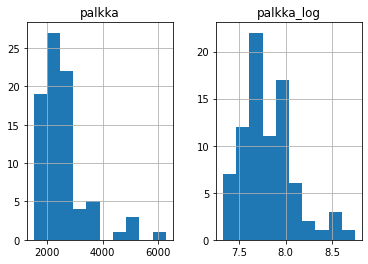

In [15]:
df['palkka_log'] = np.log(df['palkka'])

# Katsotaan muuuttujien histogrammit
df[['palkka', 'palkka_log']].hist()

<b>Logaritmia ei voi ottaa nollasta</b>. Tämän vuoksi esimerkkidatan palveluvuosiin en voi käyttää logaritmimuunnosta. Jos lisään palveluvuosiin yhden vuoden (jolloin muuttuja ilmoittaa kuinka monetta vuotta henkilö palvelee yrityksessä), niin logaritmimuunnos onnistuu: 

array([[<AxesSubplot:title={'center':'palveluv'}>,
        <AxesSubplot:title={'center':'palveluv_log'}>]], dtype=object)

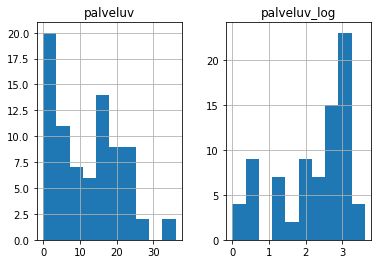

In [16]:
df['palveluv_log'] = np.log(df['palveluv']+1)

df[['palveluv', 'palveluv_log']].hist()

Muuttujien muunnoksia käytetään eri tarkoituksiin ja muunnokset ovat laaja ja monitahoinen aihe. Logaritmin ohella paljon käytettyjä muunnoksia ovat neliöjuuri, toiseen potenssiin korottaminen, käänteisluku jne.   

## Datan tasapainottaminen

Luokittelumalleja käytettäessä opetusdata kannattaa tasapainottaa jos jokin luokista on selvästi aliedustettuna. Tasapainottamisen voi tehdä monella tavalla. Katso https://towardsdatascience.com/5-techniques-to-work-with-imbalanced-data-in-machine-learning-80836d45d30c

Helppo tapa tasapainoltukseen on käyttää **imbalanced-learn** -kirjastoa: https://imbalanced-learn.org/stable/.
Kirjaston voi asentaa Anacondaan komentoriviltä (command prompt) komennolla

**conda install -c conda-forge imbalanced-learn**

In [17]:
# Jos df2:n kuntosalin käyttöä mittaava muuttuja olisi kohdemuuttujana
# niin käyttäjien määrä on aliedustettuna
df2['kuntosa'].value_counts()

0.0    73
1.0     9
Name: kuntosa, dtype: int64

In [18]:
# Tuodaan RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

# Selittävät muuttujat
X = df2.drop('kuntosa', axis=1)

# Kohdemuuttuja
y = df2['kuntosa']

# Tasapainotus
ros = RandomOverSampler(random_state=2)
X, y = ros.fit_resample(X, y)

# Tarkistetaan kohdemuuttujan jakauma
pd.DataFrame(y).value_counts()

kuntosa
0.0        73
1.0        73
dtype: int64

## Lisätietoa

Data-analytiikka Pythonilla: https://tilastoapu.wordpress.com/python/